In [1]:
import pandas as pd
import numpy as np

### Load data

In [19]:
df = pd.read_csv('/Users/chenjiqing/Public/kaggle/google brain ventilator/raw data/train.csv')
df_test = pd.read_csv('/Users/chenjiqing/Public/kaggle/google brain ventilator/raw data/test.csv')
df

,id,breath_id,R,C,time_step,u_in,u_out,pressure
0,1,1,20,50,0.000000,0.083334,0,5.837492
1,2,1,20,50,0.033652,18.383041,0,5.907794
2,3,1,20,50,0.067514,22.509278,0,7.876254
3,4,1,20,50,0.101542,22.808822,0,11.742872
4,5,1,20,50,0.135756,25.355850,0,12.234987
...,...,...,...,...,...,...,...,...
6035995,6035996,125749,50,10,2.504603,1.489714,1,3.869032
6035996,6035997,125749,50,10,2.537961,1.488497,1,3.869032
6035997,6035998,125749,50,10,2.571408,1.558978,1,3.798729
6035998,6035999,125749,50,10,2.604744,1.272663,1,4.079938


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6036000 entries, 0 to 6035999
Data columns (total 8 columns):
 #   Column     Dtype  
---  ------     -----  
 0   id         int64  
 1   breath_id  int64  
 2   R          int64  
 3   C          int64  
 4   time_step  float64
 5   u_in       float64
 6   u_out      int64  
 7   pressure   float64
dtypes: float64(3), int64(5)
memory usage: 368.4 MB


In [4]:
print(df[df['breath_id']==2].head(60))
#print(df[df['breath_id']==9].head(40))

      id  breath_id   R   C  time_step       u_in  u_out   pressure
80    81          2  20  20   0.000000  12.184338      0   6.048398
81    82          2  20  20   0.033998  13.980205      0   7.524743
82    83          2  20  20   0.068151  12.574163      0   9.282297
83    84          2  20  20   0.102062  11.730537      0  10.336829
84    85          2  20  20   0.135917  12.124229      0   9.844714
85    86          2  20  20   0.170010  11.055636      0  11.180455
86    87          2  20  20   0.204087  10.774428      0  11.531965
87    88          2  20  20   0.238071  11.111878      0  11.110153
88    89          2  20  20   0.272077  10.099527      0  12.375591
89    90          2  20  20   0.306069  10.043285      0  12.445893
90    91          2  20  20   0.339961   9.424626      0  13.219217
91    92          2  20  20   0.374056   9.424626      0  13.219217
92    93          2  20  20   0.407880   9.030934      0  13.711332
93    94          2  20  20   0.442127   8.01858

In [5]:
print(df[df['breath_id']==1]['R'].value_counts())
print(df[df['breath_id']==1]['C'].value_counts())
print(df[df['breath_id']==3]['R'].value_counts())
print(df[df['breath_id']==3]['C'].value_counts())

20    80
Name: R, dtype: int64
50    80
Name: C, dtype: int64
50    80
Name: R, dtype: int64
20    80
Name: C, dtype: int64


# For each 'breath_id', have the same 'R' and 'C'

In [6]:
df['R'].value_counts()

50    2410080
5     1988800
20    1637120
Name: R, dtype: int64

In [7]:
df['C'].value_counts()

10    2244720
50    1971680
20    1819600
Name: C, dtype: int64

In [8]:
df['u_out'].value_counts()

1    3745032
0    2290968
Name: u_out, dtype: int64

## Idea 1: Maybe can use C/R as a new feature. If this ratio is higher (C increase, or R decrease or both), the balloon is much more easy to blow.

## Idea 1.1: treat R C as String
## df['R'] = df['R'].astype(str)
## print(df)
## df['C'] = df['C'].astype(str)
## print(df)
## df['RC'] = df['R']+df['C']
## print(df)

## Idea 2: time_step.diff * u_in + -(time_step.diff * u_out)

In [9]:
df

,id,breath_id,R,C,time_step,u_in,u_out,pressure
0,1,1,20,50,0.000000,0.083334,0,5.837492
1,2,1,20,50,0.033652,18.383041,0,5.907794
2,3,1,20,50,0.067514,22.509278,0,7.876254
3,4,1,20,50,0.101542,22.808822,0,11.742872
4,5,1,20,50,0.135756,25.355850,0,12.234987
...,...,...,...,...,...,...,...,...
6035995,6035996,125749,50,10,2.504603,1.489714,1,3.869032
6035996,6035997,125749,50,10,2.537961,1.488497,1,3.869032
6035997,6035998,125749,50,10,2.571408,1.558978,1,3.798729
6035998,6035999,125749,50,10,2.604744,1.272663,1,4.079938


In [33]:
#df.groupby('breath_id')['u_in'].first()
#df.groupby('breath_id')['u_in'].ewm(halflife=9).mean()
print(df.groupby('breath_id')['u_in'].transform(lambda x: x.ewm(halflife=1).mean()))
df['ewm_u_in_mean'] = df.groupby('breath_id')['u_in'].transform(lambda x: x.ewm(halflife=9).mean())
df['ewm_u_in_mean2'] = df.groupby('breath_id')['u_in'].transform(lambda x: x.ewm(halflife=9).mean().reset_index(level=0,drop=True))

0           0.083334
1          12.283139
2          18.126647
3          20.623807
4          23.066152
             ...    
6035995     1.438394
6035996     1.463446
6035997     1.511212
6035998     1.391937
6035999     1.437338
Name: u_in, Length: 6036000, dtype: float64


In [35]:
df

,id,breath_id,R,C,time_step,u_in,u_out,pressure,ewm_u_in_mean,ewm_u_in_mean2
0,1,1,20,50,0.000000,0.083334,0,5.837492,0.083334,0.083334
1,2,1,20,50,0.033652,18.383041,0,5.907794,9.585358,9.585358
2,3,1,20,50,0.067514,22.509278,0,7.876254,14.229040,14.229040
3,4,1,20,50,0.101542,22.808822,0,11.742872,16.627759,16.627759
4,5,1,20,50,0.135756,25.355850,0,12.234987,18.652046,18.652046
...,...,...,...,...,...,...,...,...,...,...
6035995,6035996,125749,50,10,2.504603,1.489714,1,3.869032,1.626944,1.626944
6035996,6035997,125749,50,10,2.537961,1.488497,1,3.869032,1.616654,1.616654
6035997,6035998,125749,50,10,2.571408,1.558978,1,3.798729,1.612368,1.612368
6035998,6035999,125749,50,10,2.604744,1.272663,1,4.079938,1.587130,1.587130


In [10]:
def feature_engin(df):
    df['time_interval'] = df.groupby('breath_id')['time_step'].diff().fillna(0)
    df['In_interval'] = df.groupby('breath_id')['u_in'].shift(1).fillna(0)*df['time_interval']
    df['Out_interval'] = df.groupby('breath_id')['u_out'].shift(1).fillna(0)*df['time_interval']
    df['accum_prior_In'] = df.groupby('breath_id')['In_interval'].cumsum()
    df['accum_prior_Out'] = df.groupby('breath_id')['Out_interval'].cumsum()
    #train['u_in_cumsum'] = train.groupby(['breath_id'])['u_in'].cumsum()
    #train['time_step_cumsum'] = train.groupby(['breath_id'])['time_step'].cumsum()
    df['R_div_C'] = df['R'].div(df['C'])
    df['R'] = df['R'].astype(str)
    df['C'] = df['C'].astype(str)
    df['RC'] = df['R']+df['C']
    # df = pd.get_dummies(df)
    df['In_change'] = df.groupby('breath_id')['u_in'].diff().fillna(0)
    df['Out_change'] = df.groupby('breath_id')['u_out'].diff().fillna(0)
    df['last_value_u_in'] = df.groupby('breath_id')['u_in'].transform('last')
    df['first_value_u_in'] = df.groupby('breath_id')['u_in'].transform('first')
    df['first_value_u_out'] = df.groupby('breath_id')['u_out'].transform('first')
    df['shift1_u_in'] = df.groupby('breath_id')['u_in'].shift(1).fillna(0)
    df['shift1_u_out'] = df.groupby('breath_id')['u_out'].shift(1).fillna(0)
    df['shift2_u_in'] = df.groupby('breath_id')['u_in'].shift(2)
    df['shift2_u_out'] = df.groupby('breath_id')['u_out'].shift(2)
    df['shift3_u_in'] = df.groupby('breath_id')['u_in'].shift(3)
    df['shift3_u_out'] = df.groupby('breath_id')['u_out'].shift(3)
    df['shift-1_u_in'] = df.groupby('breath_id')['u_in'].shift(-1)
    df['shift-1_u_out'] = df.groupby('breath_id')['u_out'].shift(-1)
    df['shift-2_u_in'] = df.groupby('breath_id')['u_in'].shift(-2)
    df['shift-2_u_out'] = df.groupby('breath_id')['u_out'].shift(-2)
    df['shift-3_u_in'] = df.groupby('breath_id')['u_in'].shift(-3)
    df['shift-3_u_out'] = df.groupby('breath_id')['u_out'].shift(-3)
    df['In_change2'] = df['u_in'] - df['shift2_u_in']
    df['Out_change2'] = df['u_out'] - df['shift2_u_out']
    df['In_change3'] = df['u_in'] - df['shift3_u_in']
    df['Out_change3'] = df['u_out'] - df['shift3_u_out']
    df['In_change-1'] = df['u_in'] - df['shift-1_u_in']
    df['Out_change-1'] = df['u_out'] - df['shift-1_u_out']
    df['In_change-2'] = df['u_in'] - df['shift-2_u_in']
    df['Out_change-2'] = df['u_out'] - df['shift-2_u_out']
    df['In_change-3'] = df['u_in'] - df['shift-3_u_in']
    df['Out_change-3'] = df['u_out'] - df['shift-3_u_out']
    df.loc[df['time_step'] == 0, 'In_change2'] = 0
    df.loc[df['time_step'] == 0, 'Out_change2'] = 0
    df.loc[df['time_step'] == 0, 'In_change3'] = 0
    df.loc[df['time_step'] == 0, 'Out_change3'] = 0
    df.loc[df['time_step'] == 0, 'In_change-1'] = 0
    df.loc[df['time_step'] == 0, 'Out_change-1'] = 0
    df.loc[df['time_step'] == 0, 'In_change-2'] = 0
    df.loc[df['time_step'] == 0, 'Out_change-2'] = 0
    df.loc[df['time_step'] == 0, 'In_change-3'] = 0
    df.loc[df['time_step'] == 0, 'Out_change-3'] = 0
    df['u_in__max'] = df.groupby(['breath_id'])['u_in'].transform('max')
    #df['u_out__max'] = df.groupby(['breath_id'])['u_out'].transform('max')
    #df['u_out__mean'] =df.groupby(['breath_id'])['u_out'].transform('mean')
    df['u_in__mean'] =df.groupby(['breath_id'])['u_in'].transform('mean')
    df['u_in__min'] = df.groupby(['breath_id'])['u_in'].transform('min')
    #df['u_out__min'] = df.groupby(['breath_id'])['u_out'].transform('min')
    df['u_in_diffmax'] = df['u_in__max'] - df['u_in']
    df['u_in_diffmean'] = df['u_in__mean'] - df['u_in']
    # feature by u in or out (ideally - make 2 sep columns for each state) # dan
    df['group_out_id_Insum'] = df.groupby(['breath_id','u_out'])['u_in'].transform('sum')
    # CV mean score: 0.3433, std: 0.0016.
    df['EMA_u_in_mean'] = df.groupby('breath_id')['In_interval'].transform(lambda x: x.ewm(span=10).mean())
    df['EMA_u_out_mean'] = df.groupby('breath_id')['Out_interval'].transform(lambda x: x.ewm(span=10).mean())
    df['EMA_u_in_std'] = df.groupby('breath_id')['In_interval'].transform(lambda x: x.ewm(span=10).std())
    df['EMA_u_out_std'] = df.groupby('breath_id')['Out_interval'].transform(lambda x: x.ewm(span=10).std())
    df['SMA_u_in_mean'] = df.groupby('breath_id')['In_interval'].transform(lambda x: x.rolling(10,min_periods=1).mean())
    df['SMA_u_out_mean'] = df.groupby('breath_id')['Out_interval'].transform(lambda x: x.rolling(10,min_periods=1).mean())
    df['SMA_u_in_std'] = df.groupby('breath_id')['In_interval'].transform(lambda x: x.rolling(10,min_periods=1).std())
    df['SMA_u_out_std'] = df.groupby('breath_id')['Out_interval'].transform(lambda x: x.rolling(10,min_periods=1).std())
    df['SMA_u_in_min'] = df.groupby('breath_id')['In_interval'].transform(lambda x: x.rolling(10,min_periods=1).min())
    df['SMA_u_in_max'] = df.groupby('breath_id')['In_interval'].transform(lambda x: x.rolling(10,min_periods=1).max())
    df['SMA_u_in_sum'] = df.groupby('breath_id')['In_interval'].transform(lambda x: x.rolling(10,min_periods=1).sum())
    # CV mean score: 0.3409, std: 0.0009.
    return df

In [11]:
train = feature_engin(df)
test = feature_engin(df_test)

# Check info.

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6036000 entries, 0 to 6035999
Data columns (total 59 columns):
 #   Column              Dtype  
---  ------              -----  
 0   id                  int64  
 1   breath_id           int64  
 2   R                   object 
 3   C                   object 
 4   time_step           float64
 5   u_in                float64
 6   u_out               int64  
 7   pressure            float64
 8   time_interval       float64
 9   In_interval         float64
 10  Out_interval        float64
 11  accum_prior_In      float64
 12  accum_prior_Out     float64
 13  R_div_C             float64
 14  RC                  object 
 15  In_change           float64
 16  Out_change          float64
 17  last_value_u_in     float64
 18  first_value_u_in    float64
 19  first_value_u_out   int64  
 20  shift1_u_in         float64
 21  shift1_u_out        float64
 22  shift2_u_in         float64
 23  shift2_u_out        float64
 24  shift3_u_in         floa

In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024000 entries, 0 to 4023999
Data columns (total 58 columns):
 #   Column              Dtype  
---  ------              -----  
 0   id                  int64  
 1   breath_id           int64  
 2   R                   object 
 3   C                   object 
 4   time_step           float64
 5   u_in                float64
 6   u_out               int64  
 7   time_interval       float64
 8   In_interval         float64
 9   Out_interval        float64
 10  accum_prior_In      float64
 11  accum_prior_Out     float64
 12  R_div_C             float64
 13  RC                  object 
 14  In_change           float64
 15  Out_change          float64
 16  last_value_u_in     float64
 17  first_value_u_in    float64
 18  first_value_u_out   int64  
 19  shift1_u_in         float64
 20  shift1_u_out        float64
 21  shift2_u_in         float64
 22  shift2_u_out        float64
 23  shift3_u_in         float64
 24  shift3_u_out        floa

In [12]:
train.describe()

,id,breath_id,time_step,u_in,u_out,pressure,time_interval,In_interval,Out_interval,accum_prior_In,accum_prior_Out
count,6.036000e+06,6.036000e+06,6.036000e+06,6.036000e+06,6.036000e+06,6.036000e+06,6.036000e+06,6.036000e+06,6.036000e+06,6.036000e+06,6.036000e+06
mean,3.018000e+06,6.283886e+04,1.307225e+00,7.321615e+00,6.204493e-01,1.122041e+01,3.268504e-02,2.404880e-01,2.014043e-02,1.320510e+01,5.004257e-01
std,1.742443e+06,3.633526e+04,7.659778e-01,1.343470e+01,4.852752e-01,8.109703e+00,3.876106e-03,4.451535e-01,1.620182e-02,1.369207e+01,5.431057e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.895744e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.509001e+06,3.137700e+04,6.428995e-01,3.936623e-01,0.000000e+00,6.329607e+00,3.188229e-02,2.941714e-04,0.000000e+00,4.239140e+00,0.000000e+00
50%,3.018000e+06,6.276550e+04,1.308123e+00,4.386146e+00,1.000000e+00,7.032628e+00,3.342915e-02,1.412165e-01,3.178716e-02,8.889135e+00,3.052641e-01
75%,4.527000e+06,9.430100e+04,1.965502e+00,4.983895e+00,1.000000e+00,1.364103e+01,3.404236e-02,1.704164e-01,3.384495e-02,1.677548e+01,9.635208e-01
max,6.036000e+06,1.257490e+05,2.937238e+00,1.000000e+02,1.000000e+00,6.482099e+01,2.510931e-01,1.266381e+01,2.510931e-01,9.177827e+01,1.946808e+00


In [13]:
test.describe()

,id,breath_id,time_step,u_in,u_out,time_interval,In_interval,Out_interval,accum_prior_In,accum_prior_Out
count,4.024000e+06,4.024000e+06,4.024000e+06,4.024000e+06,4.024000e+06,4.024000e+06,4.024000e+06,4.024000e+06,4.024000e+06,4.024000e+06
mean,2.012000e+06,6.292796e+04,1.307083e+00,7.338098e+00,6.203864e-01,3.268143e-02,2.409942e-01,2.013613e-02,1.324531e+01,5.002710e-01
std,1.161629e+06,3.624924e+04,7.658902e-01,1.350955e+01,4.852908e-01,3.859199e-03,4.474780e-01,1.619872e-02,1.378464e+01,5.429877e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.006001e+06,3.153050e+04,6.428454e-01,4.096735e-01,0.000000e+00,3.188252e-02,6.086842e-04,0.000000e+00,4.231430e+00,0.000000e+00
50%,2.012000e+06,6.305750e+04,1.308083e+00,4.377512e+00,1.000000e+00,3.342390e-02,1.409490e-01,3.178668e-02,8.868132e+00,3.049474e-01
75%,3.018000e+06,9.433325e+04,1.965240e+00,4.983472e+00,1.000000e+00,3.404117e-02,1.703298e-01,3.383803e-02,1.678765e+01,9.634172e-01
max,4.024000e+06,1.257480e+05,2.935203e+00,1.000000e+02,1.000000e+00,2.516725e-01,3.511333e+00,2.516725e-01,9.534505e+01,1.923436e+00


In [14]:
print(train.columns)
print(test.columns)

Index(['id', 'breath_id', 'R', 'C', 'time_step', 'u_in', 'u_out', 'pressure',
       'time_interval', 'In_interval', 'Out_interval', 'accum_prior_In',
       'accum_prior_Out', 'RC'],
      dtype='object')
Index(['id', 'breath_id', 'R', 'C', 'time_step', 'u_in', 'u_out',
       'time_interval', 'In_interval', 'Out_interval', 'accum_prior_In',
       'accum_prior_Out', 'RC'],
      dtype='object')


## Check any NA in data

In [7]:
print(train.isnull().sum())
print(test.isnull().sum())

id                         0
breath_id                  0
R                          0
C                          0
time_step                  0
u_in                       0
u_out                      0
pressure                   0
time_interval              0
In_interval                0
Out_interval               0
accum_prior_In             0
accum_prior_Out            0
R_div_C                    0
RC                         0
In_change                  0
Out_change                 0
last_value_u_in            0
first_value_u_in           0
first_value_u_out          0
shift1_u_in                0
shift1_u_out               0
shift2_u_in           150900
shift2_u_out          150900
shift3_u_in           226350
shift3_u_out          226350
shift-1_u_in           75450
shift-1_u_out          75450
shift-2_u_in          150900
shift-2_u_out         150900
shift-3_u_in          226350
shift-3_u_out         226350
In_change2             75450
Out_change2            75450
In_change3    

### No missing values in data

In [14]:
targets = train[['pressure']]
targets

,pressure
0,5.837492
1,5.907794
2,7.876254
3,11.742872
4,12.234987
...,...
6035995,3.869032
6035996,3.869032
6035997,3.798729
6035998,4.079938


In [15]:
train.drop(['pressure','id', 'breath_id','time_interval','In_interval','Out_interval'], axis=1, inplace=True)
test = test.drop(['id', 'breath_id','time_interval','In_interval','Out_interval'], axis=1)

In [16]:
print(train.columns)
print(test.columns)

Index(['R', 'C', 'time_step', 'u_in', 'u_out', 'time_interval', 'In_interval',
       'Out_interval', 'accum_prior_In', 'accum_prior_Out', 'R_div_C', 'RC',
       'In_change', 'Out_change', 'last_value_u_in', 'first_value_u_in',
       'first_value_u_out', 'shift1_u_in', 'shift1_u_out', 'shift2_u_in',
       'shift2_u_out', 'shift3_u_in', 'shift3_u_out', 'shift-1_u_in',
       'shift-1_u_out', 'shift-2_u_in', 'shift-2_u_out', 'shift-3_u_in',
       'shift-3_u_out', 'In_change2', 'Out_change2', 'In_change3',
       'Out_change3', 'In_change-1', 'Out_change-1', 'In_change-2',
       'Out_change-2', 'In_change-3', 'Out_change-3', 'u_in__max',
       'u_in__mean', 'u_in__min', 'u_in_diffmax', 'u_in_diffmean',
       'group_out_id_Insum'],
      dtype='object')
Index(['R', 'C', 'time_step', 'u_in', 'u_out', 'time_interval', 'In_interval',
       'Out_interval', 'accum_prior_In', 'accum_prior_Out', 'R_div_C', 'RC',
       'In_change', 'Out_change', 'last_value_u_in', 'first_value_u_in',
    

In [16]:
train2 = pd.get_dummies(train)
test2 = pd.get_dummies(test)
print(train2)
print(test2)

         time_step       u_in  u_out  time_interval  In_interval  \
0         0.000000   0.083334      0       0.000000     0.000000   
1         0.033652  18.383041      0       0.033652     0.002804   
2         0.067514  22.509278      0       0.033862     0.622489   
3         0.101542  22.808822      0       0.034028     0.765942   
4         0.135756  25.355850      0       0.034213     0.780365   
...            ...        ...    ...            ...          ...   
6035995   2.504603   1.489714      1       0.033412     0.047468   
6035996   2.537961   1.488497      1       0.033358     0.049693   
6035997   2.571408   1.558978      1       0.033447     0.049785   
6035998   2.604744   1.272663      1       0.033337     0.051971   
6035999   2.638017   1.482739      1       0.033273     0.042345   

         Out_interval  accum_prior_In  accum_prior_Out  R_div_C  In_change  \
0            0.000000        0.000000         0.000000      0.4   0.000000   
1            0.000000      

In [17]:
from sklearn.preprocessing import RobustScaler, normalize
RS = RobustScaler()
train3 = RS.fit_transform(train2)
test3 = RS.transform(test2)

In [46]:
train3

array([[-0.98905216, -0.93738445, -1.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.96360815,  3.04927811, -1.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.93800551,  3.94819476, -1.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.95515103, -0.61590969,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.98035655, -0.67828445,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.00551376, -0.63251859,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [23]:
print(train3.shape)
print(test3.shape)

(6036000, 68)
(4024000, 68)


In [27]:
##train4 = train3.reshape(-1, 80, train3.shape[-1])
##test4 = test3.reshape(-1, 80, train3.shape[-1])

## Test best parameter

In [21]:
for_para_train = train3[:2400]
for_para_train
for_para_train_target = targets[:2400]
for_para_train_target
for_para_test = train3[2400:4800]
for_para_test_target = targets[2400:4800]

# Optimize Parameters using Cross Validation and GridSearch()

## LGBM

In [21]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import GroupKFold
import time

In [22]:
model_GSCV = LGBMRegressor(
          objective = 'regression',
          #'learning_rate'= 0.25,
          boosting_type= "gbdt",
          #min_data_in_leaf= 120,#600,
          #max_bin= 210, #196,
#           'device':'gpu',
          feature_fraction= 0.5, #0.4,
          #lambda_l1=36, lambda_l2=80,
          #'max_depth':16,
          #num_leaves=1000,
          metric= 'mae',
          n_jobs= -1
)

In [71]:
# Round 1
param_grid2 = {
          'learning_rate': [0.27,0.3,0.33],
          #"boosting_type": "gbdt",
          #'min_data_in_leaf': 120,#600,
          #'max_bin': 210, #196,
#           'device':'gpu',
          #'feature_fraction': 0.5, #0.4,
          'reg_lambda':[9,10,12,13],
          'max_depth':[18,19,20,22],
          'num_leaves':[25,50,60]
          #"metric": 'mae',
          #'n_jobs': -1
}

In [72]:
optimal_params = GridSearchCV(estimator=model_GSCV,
                             param_grid=param_grid2,
                             scoring='neg_mean_absolute_error',
                             verbose=0,
                             n_jobs = 10,
                             cv = 2)
optimal_params.fit(for_para_train,
            for_para_train_target)
print(optimal_params.best_params_)
print(optimal_params.best_score_)

/Users/chenjiqing/anaconda3/envs/Class/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


{'learning_rate': 0.3, 'max_depth': 19, 'num_leaves': 50, 'reg_lambda': 12}
-2.581108306675091


In [16]:
scores = []
feature_importance = pd.DataFrame()
models = []
columns = [col for col in train2.columns]
folds = GroupKFold(n_splits=5)
params = {'objective': 'regression',
          'learning_rate': 0.3,
          "boosting_type": "gbdt",
          #'min_data_in_leaf': 120,#600,
          #'max_bin': 210, #196,
#           'device':'gpu',
          'feature_fraction': 0.8, #0.5 first try:CV mean score: 0.7309, std: 0.0023. #1 second try: CV mean score: 0.7006, std: 0.0019.
          #'lambda_l1':36, 'lambda_l2':80,
          'reg_lambda':8.5,
          'max_depth':20,
          'num_leaves':1000,
          "metric": 'mae',
          'n_jobs': -1
         }
for fold_n, (train_index, valid_index) in enumerate(folds.split(df, targets, groups=df['breath_id'])):
    print(f'Fold {fold_n} started at {time.ctime()}')
    X_train, X_valid = train3[train_index], train3[valid_index]
    y_train, y_valid = targets.iloc[train_index], targets.iloc[valid_index]
    model = LGBMRegressor(**params, n_estimators=6000) # 8000
    model.fit(X_train, y_train, 
            eval_set=[(X_train, y_train), (X_valid, y_valid)],
            verbose=100, early_stopping_rounds=15)
    score = metrics.mean_absolute_error(y_valid, model.predict(X_valid))
    
    models.append(model)
    scores.append(score)

    fold_importance = pd.DataFrame()
    fold_importance["feature"] = columns
    fold_importance["importance"] = model.feature_importances_
    fold_importance["fold"] = fold_n + 1
    feature_importance = pd.concat([feature_importance, fold_importance], axis=0)
    
print('CV mean score: {0:.4f}, std: {1:.4f}.'.format(np.mean(scores), np.std(scores)))

Fold 0 started at Sun Oct  3 18:25:37 2021


/Users/chenjiqing/anaconda3/envs/Class/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
Training until validation scores don't improve for 15 rounds
[100]	training's l1: 0.330749	valid_1's l1: 0.391233
[200]	training's l1: 0.285729	valid_1's l1: 0.370877
[300]	training's l1: 0.258515	valid_1's l1: 0.361596
[400]	training's l1: 0.238848	valid_1's l1: 0.355859
[500]	training's l1: 0.224246	valid_1's l1: 0.351989
[600]	training's l1: 0.211583	valid_1's l1: 0.349324
[700]	training's l1: 0.201152	valid_1's l1: 0.347415
[800]	training's l1: 0.191893	valid_1's l1: 0.345598
[900]	training's l1: 0.184042	valid_1's l1: 0.344616
[1000]	training's l1: 0.176754	valid_1's l1: 0.34353
[1100]	training's l1: 0.170098	valid_1's l1: 0.342763
[1200]	training's l1: 0.164344	valid_1's l1: 0.342047
[1300]	training's l1: 0.158802	valid_1's l1: 0.341297
[1400]	training's l1: 0.153452	valid_1's l1: 0.3409
[1500]	training's l1: 0.148722	valid_1's l1: 0.340473
[1600]	training's

/Users/chenjiqing/anaconda3/envs/Class/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
Training until validation scores don't improve for 15 rounds
[100]	training's l1: 0.328336	valid_1's l1: 0.391529
[200]	training's l1: 0.285353	valid_1's l1: 0.37327
[300]	training's l1: 0.258283	valid_1's l1: 0.363501
[400]	training's l1: 0.23797	valid_1's l1: 0.357936
[500]	training's l1: 0.222661	valid_1's l1: 0.353767
[600]	training's l1: 0.210556	valid_1's l1: 0.351388
[700]	training's l1: 0.200387	valid_1's l1: 0.349484
[800]	training's l1: 0.191323	valid_1's l1: 0.347789
[900]	training's l1: 0.18327	valid_1's l1: 0.346623
[1000]	training's l1: 0.175716	valid_1's l1: 0.345614
[1100]	training's l1: 0.169145	valid_1's l1: 0.344652
[1200]	training's l1: 0.162949	valid_1's l1: 0.343991
[1300]	training's l1: 0.157588	valid_1's l1: 0.34335
[1400]	training's l1: 0.152468	valid_1's l1: 0.342802
[1500]	training's l1: 0.147472	valid_1's l1: 0.342389
[1600]	training's 

/Users/chenjiqing/anaconda3/envs/Class/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
Training until validation scores don't improve for 15 rounds
[100]	training's l1: 0.331041	valid_1's l1: 0.394252
[200]	training's l1: 0.285788	valid_1's l1: 0.374997
[300]	training's l1: 0.259119	valid_1's l1: 0.364073
[400]	training's l1: 0.239527	valid_1's l1: 0.358732
[500]	training's l1: 0.224565	valid_1's l1: 0.354638
[600]	training's l1: 0.212334	valid_1's l1: 0.352513
[700]	training's l1: 0.202066	valid_1's l1: 0.350445
[800]	training's l1: 0.192884	valid_1's l1: 0.348865
[900]	training's l1: 0.184576	valid_1's l1: 0.347361
[1000]	training's l1: 0.17734	valid_1's l1: 0.346326
[1100]	training's l1: 0.170238	valid_1's l1: 0.34534
[1200]	training's l1: 0.164191	valid_1's l1: 0.344669
[1300]	training's l1: 0.158498	valid_1's l1: 0.344086
[1400]	training's l1: 0.153125	valid_1's l1: 0.343432
[1500]	training's l1: 0.148355	valid_1's l1: 0.343031
[1600]	training'

/Users/chenjiqing/anaconda3/envs/Class/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
Training until validation scores don't improve for 15 rounds
[100]	training's l1: 0.331501	valid_1's l1: 0.391734
[200]	training's l1: 0.285322	valid_1's l1: 0.372109
[300]	training's l1: 0.259053	valid_1's l1: 0.362375
[400]	training's l1: 0.238786	valid_1's l1: 0.356822
[500]	training's l1: 0.223855	valid_1's l1: 0.353003
[600]	training's l1: 0.212094	valid_1's l1: 0.350255
[700]	training's l1: 0.201231	valid_1's l1: 0.34832
[800]	training's l1: 0.191965	valid_1's l1: 0.346852
[900]	training's l1: 0.183396	valid_1's l1: 0.345551
[1000]	training's l1: 0.176073	valid_1's l1: 0.344422
[1100]	training's l1: 0.169656	valid_1's l1: 0.343431
[1200]	training's l1: 0.163602	valid_1's l1: 0.342733
[1300]	training's l1: 0.158138	valid_1's l1: 0.342243
[1400]	training's l1: 0.15287	valid_1's l1: 0.341659
[1500]	training's l1: 0.148109	valid_1's l1: 0.341205
Early stopping, 

/Users/chenjiqing/anaconda3/envs/Class/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
Training until validation scores don't improve for 15 rounds
[100]	training's l1: 0.33173	valid_1's l1: 0.393767
[200]	training's l1: 0.287341	valid_1's l1: 0.373516
[300]	training's l1: 0.2599	valid_1's l1: 0.364382
[400]	training's l1: 0.240176	valid_1's l1: 0.358491
[500]	training's l1: 0.225124	valid_1's l1: 0.354419
[600]	training's l1: 0.212715	valid_1's l1: 0.351536
[700]	training's l1: 0.201986	valid_1's l1: 0.349582
[800]	training's l1: 0.192757	valid_1's l1: 0.347878
[900]	training's l1: 0.184435	valid_1's l1: 0.346567
[1000]	training's l1: 0.177086	valid_1's l1: 0.345591
[1100]	training's l1: 0.170457	valid_1's l1: 0.344895
[1200]	training's l1: 0.164471	valid_1's l1: 0.344292
[1300]	training's l1: 0.158783	valid_1's l1: 0.343762
[1400]	training's l1: 0.153646	valid_1's l1: 0.343272
[1500]	training's l1: 0.149151	valid_1's l1: 0.342837
[1600]	training's

## After GridsearchCV

In [24]:
scores = []
feature_importance = pd.DataFrame()
models = []
columns = [col for col in train2.columns]
folds = GroupKFold(n_splits=5)
params = {'objective': 'regression',
          'learning_rate': 0.3,
          "boosting_type": "gbdt",
          #'min_data_in_leaf': 120,#600,
          #'max_bin': 210, #196,
#           'device':'gpu',
          'feature_fraction': 1,
          #'lambda_l1':36, 'lambda_l2':80,
          'reg_lambda':12,
          'max_depth':19,
          'num_leaves':2000,
          "metric": 'mae',
          'n_jobs': -1
         }
for fold_n, (train_index, valid_index) in enumerate(folds.split(df, targets, groups=df['breath_id'])):
    print(f'Fold {fold_n} started at {time.ctime()}')
    X_train, X_valid = train3[train_index], train3[valid_index]
    y_train, y_valid = targets.iloc[train_index], targets.iloc[valid_index]
    model = LGBMRegressor(**params, n_estimators=6000) # 8000
    model.fit(X_train, y_train, 
            eval_set=[(X_train, y_train), (X_valid, y_valid)],
            verbose=100, early_stopping_rounds=15)
    score = metrics.mean_absolute_error(y_valid, model.predict(X_valid))
    
    models.append(model)
    scores.append(score)

    fold_importance = pd.DataFrame()
    fold_importance["feature"] = columns
    fold_importance["importance"] = model.feature_importances_
    fold_importance["fold"] = fold_n + 1
    feature_importance = pd.concat([feature_importance, fold_importance], axis=0)
    
print('CV mean score: {0:.4f}, std: {1:.4f}.'.format(np.mean(scores), np.std(scores)))
## CV mean score: 0.3305, std: 0.0009.

Fold 0 started at Mon Oct  4 00:01:37 2021


/Users/chenjiqing/anaconda3/envs/Class/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Training until validation scores don't improve for 15 rounds
[100]	training's l1: 0.274849	valid_1's l1: 0.357782
[200]	training's l1: 0.232049	valid_1's l1: 0.34475
[300]	training's l1: 0.206293	valid_1's l1: 0.338568
[400]	training's l1: 0.187798	valid_1's l1: 0.335452
[500]	training's l1: 0.173173	valid_1's l1: 0.33344
[600]	training's l1: 0.16088	valid_1's l1: 0.331777
[700]	training's l1: 0.150749	valid_1's l1: 0.330713
[800]	training's l1: 0.141963	valid_1's l1: 0.329877
Early stopping, best iteration is:
[796]	training's l1: 0.142264	valid_1's l1: 0.329861
Fold 1 started at Mon Oct  4 00:11:46 2021


/Users/chenjiqing/anaconda3/envs/Class/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
Training until validation scores don't improve for 15 rounds
[100]	training's l1: 0.274969	valid_1's l1: 0.361364
[200]	training's l1: 0.230446	valid_1's l1: 0.347264
[300]	training's l1: 0.205197	valid_1's l1: 0.341873
[400]	training's l1: 0.187464	valid_1's l1: 0.338638
[500]	training's l1: 0.173262	valid_1's l1: 0.336588
[600]	training's l1: 0.160749	valid_1's l1: 0.335044
[700]	training's l1: 0.150689	valid_1's l1: 0.334046
[800]	training's l1: 0.141842	valid_1's l1: 0.333376
[900]	training's l1: 0.134146	valid_1's l1: 0.332799
[1000]	training's l1: 0.127073	valid_1's l1: 0.332299
[1100]	training's l1: 0.120731	valid_1's l1: 0.332033
[1200]	training's l1: 0.114699	valid_1's l1: 0.331702
[1300]	training's l1: 0.109372	valid_1's l1: 0.331497
[1400]	training's l1: 0.104514	valid_1's l1: 0.331375
Early stopping, best iteration is:
[1412]	training's l1: 0.104021	valid_

/Users/chenjiqing/anaconda3/envs/Class/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
Training until validation scores don't improve for 15 rounds
[100]	training's l1: 0.274586	valid_1's l1: 0.360513
[200]	training's l1: 0.232022	valid_1's l1: 0.347211
[300]	training's l1: 0.205788	valid_1's l1: 0.341557
[400]	training's l1: 0.187017	valid_1's l1: 0.338321
[500]	training's l1: 0.172405	valid_1's l1: 0.336119
[600]	training's l1: 0.16065	valid_1's l1: 0.334611
[700]	training's l1: 0.150584	valid_1's l1: 0.333652
[800]	training's l1: 0.14191	valid_1's l1: 0.33281
[900]	training's l1: 0.134141	valid_1's l1: 0.332325
[1000]	training's l1: 0.126961	valid_1's l1: 0.331923
[1100]	training's l1: 0.12048	valid_1's l1: 0.331522
Early stopping, best iteration is:
[1091]	training's l1: 0.121083	valid_1's l1: 0.3315
Fold 3 started at Mon Oct  4 00:43:24 2021


/Users/chenjiqing/anaconda3/envs/Class/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
Training until validation scores don't improve for 15 rounds
[100]	training's l1: 0.274114	valid_1's l1: 0.358244
[200]	training's l1: 0.231916	valid_1's l1: 0.345083
[300]	training's l1: 0.20661	valid_1's l1: 0.33943
[400]	training's l1: 0.187907	valid_1's l1: 0.335705
[500]	training's l1: 0.173228	valid_1's l1: 0.333656
[600]	training's l1: 0.16138	valid_1's l1: 0.332402
[700]	training's l1: 0.150933	valid_1's l1: 0.331427
[800]	training's l1: 0.142401	valid_1's l1: 0.330694
[900]	training's l1: 0.134562	valid_1's l1: 0.33021
[1000]	training's l1: 0.127314	valid_1's l1: 0.329793
[1100]	training's l1: 0.120917	valid_1's l1: 0.329459
[1200]	training's l1: 0.114979	valid_1's l1: 0.329198
Early stopping, best iteration is:
[1245]	training's l1: 0.112488	valid_1's l1: 0.329098
Fold 4 started at Mon Oct  4 00:59:16 2021


/Users/chenjiqing/anaconda3/envs/Class/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
Training until validation scores don't improve for 15 rounds
[100]	training's l1: 0.27588	valid_1's l1: 0.360761
[200]	training's l1: 0.232293	valid_1's l1: 0.347678
[300]	training's l1: 0.20658	valid_1's l1: 0.341549
[400]	training's l1: 0.187274	valid_1's l1: 0.337926
[500]	training's l1: 0.172968	valid_1's l1: 0.335893
[600]	training's l1: 0.161089	valid_1's l1: 0.334595
[700]	training's l1: 0.151022	valid_1's l1: 0.333608
[800]	training's l1: 0.141973	valid_1's l1: 0.332844
[900]	training's l1: 0.134024	valid_1's l1: 0.332356
[1000]	training's l1: 0.127147	valid_1's l1: 0.331905
[1100]	training's l1: 0.120885	valid_1's l1: 0.33158
[1200]	training's l1: 0.11512	valid_1's l1: 0.331339
[1300]	training's l1: 0.109725	valid_1's l1: 0.331077
[1400]	training's l1: 0.104686	valid_1's l1: 0.330956
[1500]	training's l1: 0.0999296	valid_1's l1: 0.330853
Early stopping, best 

In [25]:
feature_importance.head(57)

,feature,importance,fold
0,time_step,46166,1
1,u_in,14563,1
2,u_out,40,1
3,time_interval,84656,1
4,In_interval,20403,1
5,Out_interval,11893,1
6,accum_prior_In,84098,1
7,accum_prior_Out,9678,1
8,R_div_C,28843,1
9,In_change,41795,1


In [26]:
models

[LGBMRegressor(feature_fraction=1, learning_rate=0.3, max_depth=19, metric='mae',
               n_estimators=6000, num_leaves=2000, objective='regression',
               reg_lambda=12),
 LGBMRegressor(feature_fraction=1, learning_rate=0.3, max_depth=19, metric='mae',
               n_estimators=6000, num_leaves=2000, objective='regression',
               reg_lambda=12),
 LGBMRegressor(feature_fraction=1, learning_rate=0.3, max_depth=19, metric='mae',
               n_estimators=6000, num_leaves=2000, objective='regression',
               reg_lambda=12),
 LGBMRegressor(feature_fraction=1, learning_rate=0.3, max_depth=19, metric='mae',
               n_estimators=6000, num_leaves=2000, objective='regression',
               reg_lambda=12),
 LGBMRegressor(feature_fraction=1, learning_rate=0.3, max_depth=19, metric='mae',
               n_estimators=6000, num_leaves=2000, objective='regression',
               reg_lambda=12)]

In [27]:
submission = pd.read_csv("/Users/chenjiqing/Public/kaggle/google brain ventilator/raw data/sample_submission.csv")
submission

,id,pressure
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
4023995,4023996,0
4023996,4023997,0
4023997,4023998,0
4023998,4023999,0


In [28]:
for model in models:
    submission['pressure'] += model.predict(test3)
submission['pressure'] /= 5

submission.to_csv('Fifth_try.csv', index=False)

## Pair plot

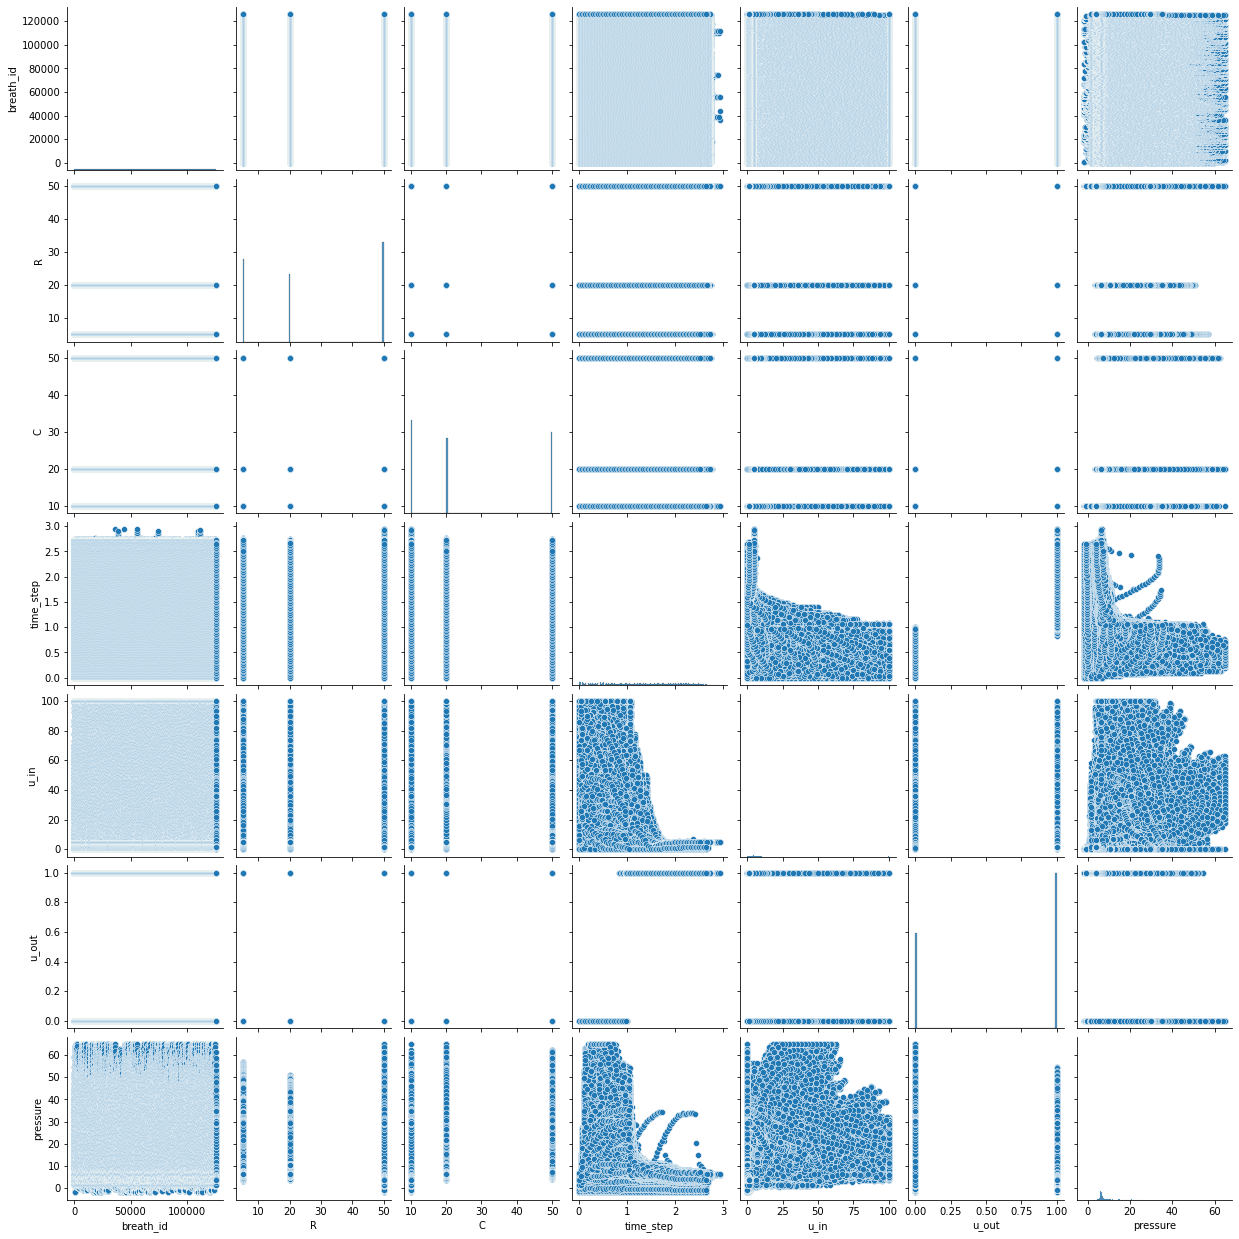

In [8]:
import seaborn as sns
sns.pairplot(df.drop('id',axis=1))

## Pearson Correlation Heatmap

import matplotlib.pyplot as plt
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features')
sns.heatmap(df.drop('id',axis=1).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

## Check pressure distribution

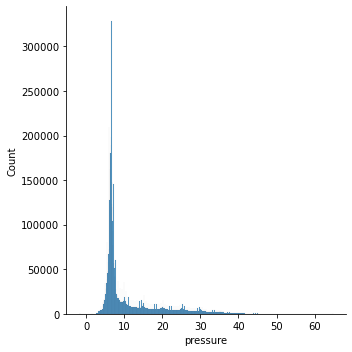

In [14]:
import seaborn as sns
pressure_distribution = sns.displot(df['pressure'])

### Pressure is skewed right, so.. log transforming it.

In [18]:
target = df['pressure'].copy()
log_pressure = np.log(target)

/Users/chenjiqing/anaconda3/envs/Class/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [15]:
target.describe()

count    6.036000e+06
mean     1.122041e+01
std      8.109703e+00
min     -1.895744e+00
25%      6.329607e+00
50%      7.032628e+00
75%      1.364103e+01
max      6.482099e+01
Name: pressure, dtype: float64

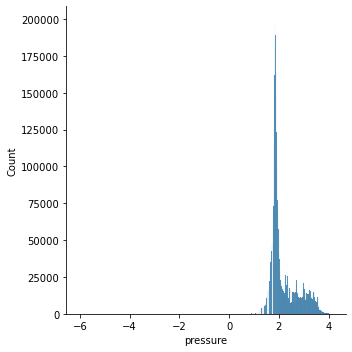

In [17]:
log_pressure_distribution = sns.displot(log_pressure)

### Or try to standardized features??

In [20]:
target

0           5.837492
1           5.907794
2           7.876254
3          11.742872
4          12.234987
             ...    
6035995     3.869032
6035996     3.869032
6035997     3.798729
6035998     4.079938
6035999     3.869032
Name: pressure, Length: 6036000, dtype: float64

In [25]:
target2 = np.array(target).reshape(-1, 1)
target2

array([[5.83749171],
       [5.90779385],
       [7.87625392],
       ...,
       [3.79872949],
       [4.07993807],
       [3.86903163]])

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
std_pressure = scaler.fit_transform(target2)

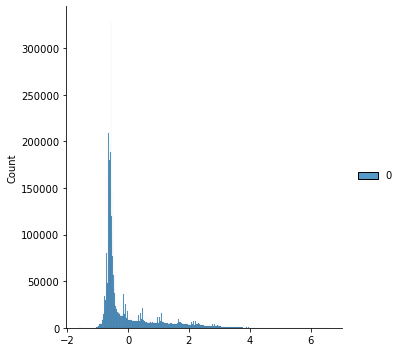

In [27]:
std_pressure_distribution = sns.displot(std_pressure)